In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import ifft
import scipy.signal.windows as ws
from scipy.signal import freqz

## Definición de datos


In [36]:
fm = 300 #frecuncia de muestreo
fr = 50 # frecuencia de corte

N = 101 # longitud del filtro deseado
M = 10*N # longitud de la respueste en frecuencia deseada  para frecuencias positivas
Mtot = 2 * M + 1 # M para frecuencias +, M para frecuencias - y una para frecuencia 0

df=fm/(Mtot) # delta para la resolución frecuencial



## Construcción de la respuesta de magnitud

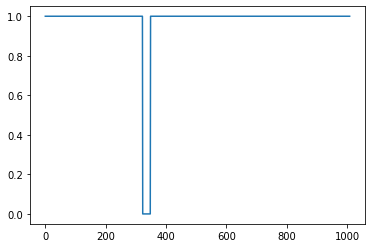

In [37]:
MD = np.ones(M) #Modulo de la frecuencia
nr = int(fr/df) #indice donde se encuentra la frecuencia que se quiere cortar

#como no se puede hacer abruptamente, se pone un intervalo de corte
# a continución hacemos un ancho de 2(hz) para el intervalo de corte, alrededor de la fr
nm = int(2/df)

# poner en cero el intervalor alrededor de la frecuencia de corte
MD[nr-nm:nr+nm] = 0

plt.plot(MD)

### Construcción del retardo
Retardar la señal para que la parte negativa empiece desde el cero, así es una señal causal. Se utiliza la propiedad "3. Desplazamiento temporal (retardo)" del libro

/home/jeremias/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


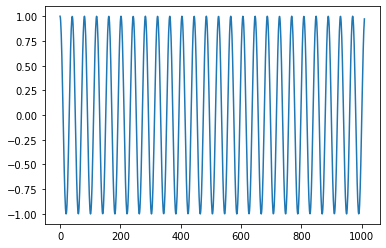

In [38]:
retardo = (N-1)/2 # esto funciona bien cuando N es impar
ph = np.exp(-1j * 2 * np.pi * retardo * np.arange(M) / Mtot) # señal de retado
plt.plot(ph)

R = MD * ph #agrego el retardo a la señal

### agregar las frecuencias negativas

las frecuencias negativas es la simetria de la positivas(un espejo) por lo tanto se concatenan las positivas y el conjugado(inverso) de éstas pero se recorren al revers

/home/jeremias/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


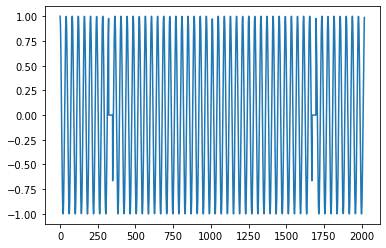

In [39]:
RN = np.flip(R[1::]).conjugate() # no se tiene en cuenta la frecuncia 0 xq ya está en las positivas
R = np.concatenate((R, RN) )
plt.plot(R)

### trasformada inversa
como ya tengo la señal lo úncio que debo hacer, es aplicar la fft inversa para obtener el filtro en el tiempo

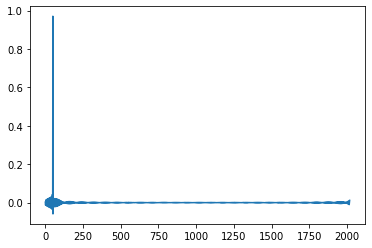

In [40]:
h = np.real(ifft(R))
plt.plot(h)

se optuvo algo similar al la sinc pero está corrida, el pulso se da en el retraso puesto

## Ventaneo
obtengo las N primeras muestras y luego aplico la ventana.
Para ver el resultado, analizo su respueststa en frecuencia

### ventana cuadrada

<StemContainer object of 3 artists>

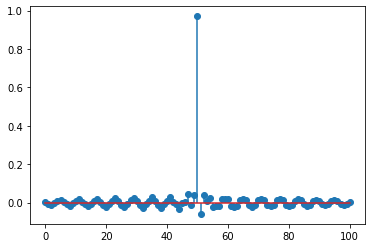

In [41]:
hf = h[:N] * ws.boxcar(N)
plt.stem(hf)


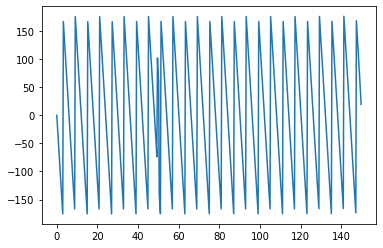

In [42]:
#respuesta en frecuencia 
#es un filtro fir por lo tanto no tiene, denomiador
# todos los valores de hf son los coeficientes del numerador

w, h = freqz(hf, fs= fm)
#plt.plot(w, np.abs(h))
plt.plot(w, np.angle(h, deg=True))
